# Name: Ashraf Mohammed Selim

## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X=np.linspace(0,20)


In [3]:
y= -2*X + 1

In [6]:
y.shape

(50,)

#### Plot your data points. 

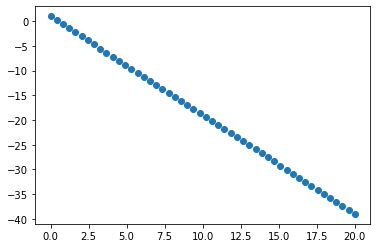

In [7]:
plt.scatter(X,y)

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

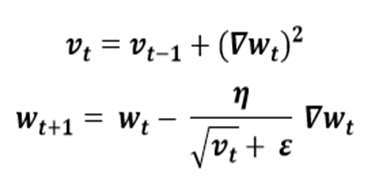

In [14]:
def AdaGrad(X,y,learningRate,epsilon,epochs):
    ''' This Function takes X: input vector, y: Target vectors, Learning rate and epochs
    
        Returns All predicted Theta_0 in all iterations,All predicted Theta_1 in all iterations,
        Corresponding loss for each Theta_0 and Theta_1 predictions,
        All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions
        Final Optimum values of Theta_0 and Theta_1.
    '''
    error_count=[]
    i=0
    theta_0=0
    theta_1=0
    vt0=0
    vt1=0
    m=len(X)
    theta1List=[]
    theta0List=[]
    hxList=[]
    hypothesis=theta_0+theta_1*X
    gradient_0=1/m * (np.sum(hypothesis-y))
    gradient_1= 1/m * (np.sum((hypothesis-y)*X))
    vector=abs(gradient_0-gradient_1)
    vectorNorm=np.linalg.norm(vector)
    while(vectorNorm>0.0000001):
        vector=abs(gradient_0-gradient_1)
        vectorNorm=np.linalg.norm(vector)
        hypothesis=theta_0+theta_1*X
        costFunction=0.5*m *np.sum((hypothesis-y)**2)
        error_count.append(costFunction)
        gradient_0= 1/m * (np.sum(hypothesis-y))
        gradient_1= 1/m * (np.sum((hypothesis-y)*X))
        vt0=vt0+(gradient_0)**2
        vt1=vt1+(gradient_1)**2
        effectiveLR0=learningRate/(np.sqrt(vt0)+epsilon)
        effectiveLR1=learningRate/(np.sqrt(vt1)+epsilon)
        theta_0= theta_0 - effectiveLR0*gradient_0
        theta_1= theta_1 - effectiveLR1*gradient_1
        theta1List.append(theta_1)
        theta0List.append(theta_0)
        hx=theta_0+theta_1*X
        hxList.append(hx)
        i+=1
        
        if i>epochs:
            break
    hx=theta_0+theta_1*X
    return theta0List,theta1List,error_count,hxList,theta_0,theta_1,hx


In [149]:

theta0ListAda,theta1ListAda,errorAda,hxListAda,theta_0Ada,theta_1Ada,hxAda=AdaGrad(X,y,0.1,1e-7,1000)

In [147]:
r2_score(y,hxAda)

# This is not a correct answer, this is just a trial 

-0.6601892922032524

Text(0, 0.5, 'loss')

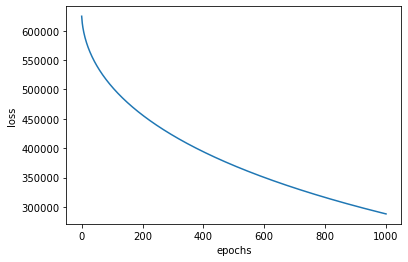

In [148]:
plt.plot(errorAda)
plt.xlabel("epochs")
plt.ylabel("loss")

# This is not a correct answer, this is just a trial 

In [151]:
r2_score(y,hxAda)
# This is the correct answer

0.9908444420242858

Text(0, 0.5, 'loss')

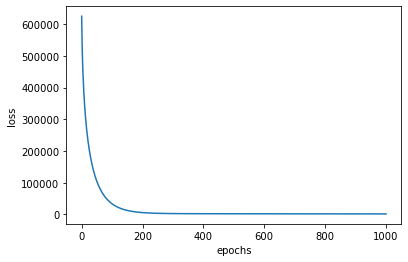

In [152]:
plt.plot(errorAda)
plt.xlabel("epochs")
plt.ylabel("loss")

# This is the correct answer

Text(0, 0.5, 'Loss')

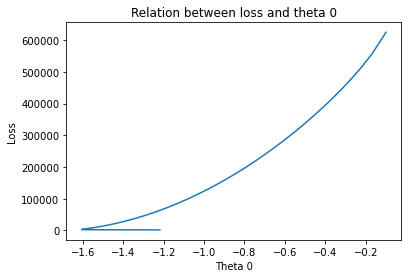

In [35]:
plt.plot(theta0ListAda,errorAda)
plt.title("Relation between loss and theta 0")
plt.xlabel("Theta 0")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

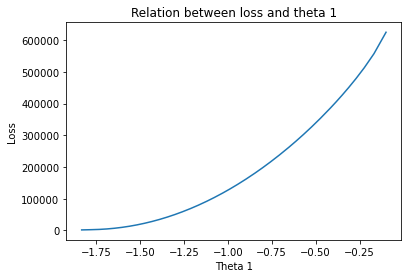

In [36]:
plt.plot(theta1ListAda,errorAda)
plt.title("Relation between loss and theta 1")
plt.xlabel("Theta 1")
plt.ylabel("Loss")

Text(0.5, 1.0, 'Relation between all fitted lines per epoch')

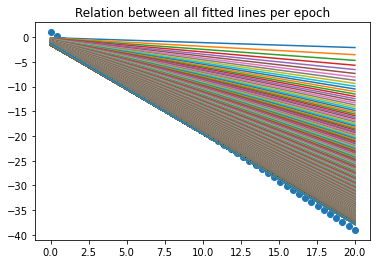

In [41]:
plt.scatter(X,y)
plt.plot(X,np.array(hxListAda).T)
plt.title("Relation between all fitted lines per epoch")


Text(0.5, 1.0, 'Best fitted line')

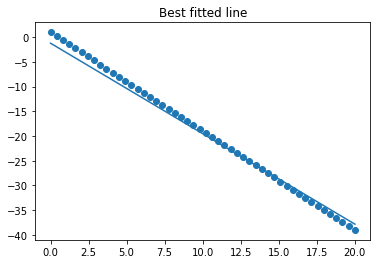

In [42]:
plt.scatter(X,y)
plt.plot(X,hxAda)
plt.title("Best fitted line")


## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

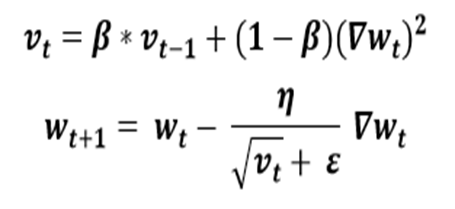

In [100]:
def RMSProp(X,y,learningRate,beta,epsilon,epochs):
    error_count=[]     #initializing an empty list to collect the error
    i=0                #initializing a counter
    theta_0=1          #initializing theta 1
    theta_1=0          #initializing theta 1
    vt0=0              #initializing vt0
    vt1=0              #initializing vt0
    
    m=len(X)
    theta1List=[]      #initializing an empty list to collect theta 0
    theta0List=[]      #initializing an empty list to collect theta 1
    hxList=[]
    hypothesis=theta_0+theta_1*X
    
    gradient_0=1/m * (np.sum(hypothesis-y))
    gradient_1= 1/m * (np.sum((hypothesis-y)*X))
    
    vector=abs(gradient_0-gradient_1)
    vectorNorm=np.linalg.norm(vector)
    
    while(vectorNorm>0.0000001):
        vector=abs(gradient_0-gradient_1)
        vectorNorm=np.linalg.norm(vector)
        hypothesis=theta_0+theta_1*X
        costFunction=0.5*m *np.sum((hypothesis-y)**2)
        error_count.append(costFunction)
        gradient_0= 1/m * (np.sum(hypothesis-y))
        gradient_1= 1/m * (np.sum((hypothesis-y)*X))
        vt0=beta*vt0+(1-beta)*(gradient_0)**2
        vt1=beta*vt1+(1-beta)*(gradient_1)**2
        effectiveLR0=learningRate/(np.sqrt(vt0)+epsilon)
        effectiveLR1=learningRate/(np.sqrt(vt1)+epsilon)
        theta_0= theta_0 - effectiveLR0*gradient_0
        theta_1= theta_1 - effectiveLR1*gradient_1
        theta1List.append(theta_1)
        theta0List.append(theta_0)
        hx=theta_0+theta_1*X
        hxList.append(hx)
        i+=1
        if i>epochs:
            break
    hx=theta_0+theta_1*X
    return theta0List,theta1List,error_count,hxList,theta_0,theta_1,hx



In [101]:
theta0ListRMS,theta1ListRMS,errorRMS,hxListRMS,theta_0RMS,theta_1RMS,hxRMS=RMSProp(X,y,0.01,0.9,1e-8,10000)

In [102]:
r2_score(y,hxRMS)

0.9999719522073235

Text(0, 0.5, 'loss')

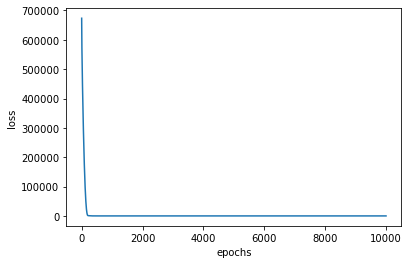

In [103]:
plt.plot(errorRMS)
plt.xlabel("epochs")
plt.ylabel("loss")

Text(0, 0.5, 'Loss')

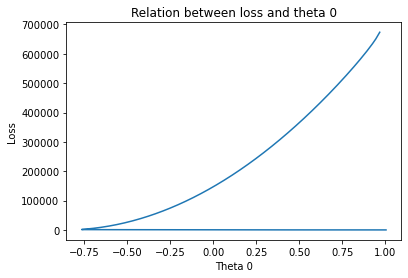

In [104]:
plt.plot(theta0ListRMS,errorRMS)
plt.title("Relation between loss and theta 0")
plt.xlabel("Theta 0")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

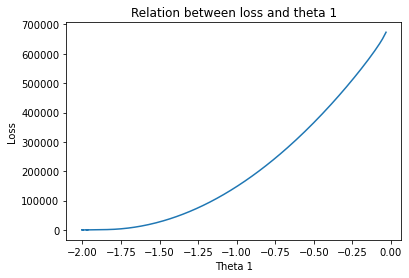

In [105]:
plt.plot(theta1ListRMS,errorRMS)
plt.title("Relation between loss and theta 1")
plt.xlabel("Theta 1")
plt.ylabel("Loss")

Text(0.5, 1.0, 'Relation between all fitted lines per epoch')

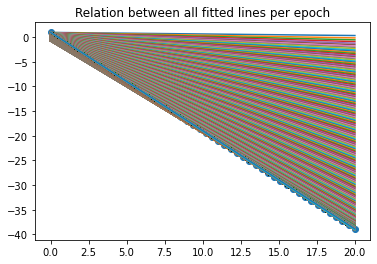

In [106]:
plt.scatter(X,y)
plt.plot(X,np.array(hxListRMS).T)
plt.title("Relation between all fitted lines per epoch")


Text(0.5, 1.0, 'Best fitted line')

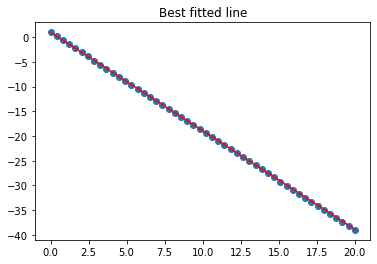

In [144]:
plt.scatter(X,y)
plt.plot(X,hxRMS,color='Red')
plt.title("Best fitted line")

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

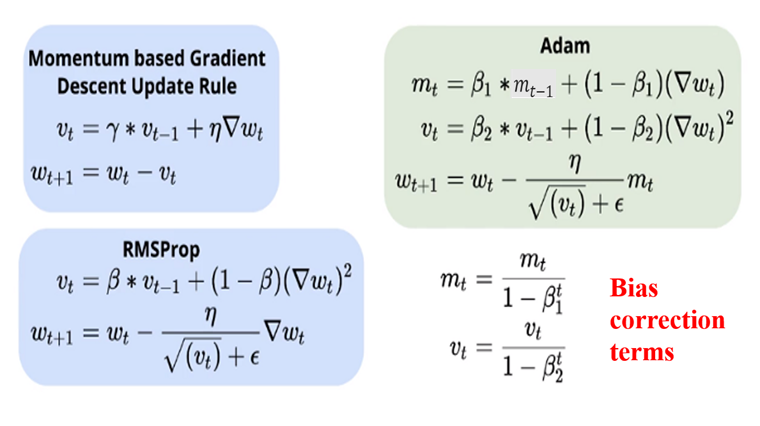

In [111]:
def Adam(X,y,learningRate,beta1,beta2,epsilon,epochs):
    error_count=[]
    i=0
    theta_0=0
    theta_1=0
    vt0=0
    vt1=0
    mt0=0
    mt1=0
    m=len(X)
    theta1List=[]
    theta0List=[]
    hxList=[]
    hypothesis=theta_0+theta_1*X
    gradient_0=1/m * (np.sum(hypothesis-y))
    gradient_1= 1/m * (np.sum((hypothesis-y)*X))
    vector=abs(gradient_0-gradient_1)
    vectorNorm=np.linalg.norm(vector)
    while(vectorNorm>0.01):
        i+=1
        vector=abs(gradient_0-gradient_1)
        vectorNorm=np.linalg.norm(vector)
        hypothesis=theta_0+theta_1*X
        costFunction=0.5*m *np.sum((hypothesis-y)**2)
        error_count.append(costFunction)
        gradient_0= 1/m * (np.sum(hypothesis-y))
        gradient_1= 1/m * (np.sum((hypothesis-y)*X))
        vt0=beta2*vt0+(1-beta2)*(gradient_0)**2
        vt1=beta2*vt1+(1-beta2)*(gradient_1)**2
        mt0=beta1*mt0+(1-beta1)*(gradient_0)
        mt1=beta1*mt1+(1-beta1)*(gradient_1)
        mt0=mt0/(1-beta1**i)
        mt1=mt1/(1-beta1**i)
        vt0=vt0/(1-beta2**i)
        vt1=vt0/(1-beta2**i)
        effectiveLR0=learningRate/(np.sqrt(vt0)+epsilon)
        effectiveLR1=learningRate/(np.sqrt(vt1)+epsilon)
        theta_0= theta_0 - effectiveLR0*mt0
        theta_1= theta_1 - effectiveLR1*mt1
        theta1List.append(theta_1)
        theta0List.append(theta_0)
        hx=theta_0+theta_1*X
        hxList.append(hx)
        if i>epochs:
            break
    hx=theta_0+theta_1*X
    return theta0List,theta1List,error_count,hxList,theta_0,theta_1,hx



In [138]:
theta0ListADAM,theta1ListADAM,errorADAM,hxListADAM,theta_0ADAM,theta_1ADAM,hxADAM=Adam(X,y,0.001,0.5,0.8,1e-7,10000)

In [139]:
r2_score(y,hxADAM)

0.999995848620333

Text(0, 0.5, 'loss')

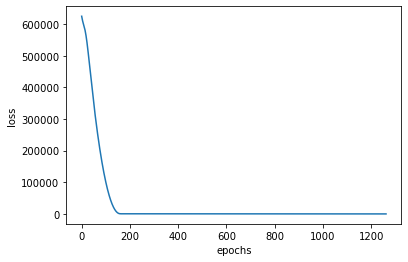

In [140]:
plt.plot(errorADAM)
plt.xlabel("epochs")
plt.ylabel("loss")

Text(0, 0.5, 'Loss')

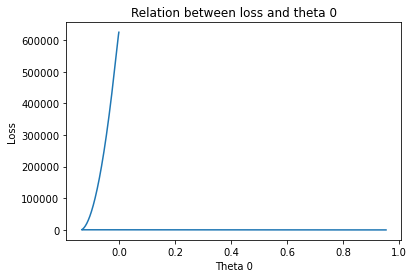

In [141]:
plt.plot(theta0ListADAM,errorADAM)
plt.title("Relation between loss and theta 0")
plt.xlabel("Theta 0")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

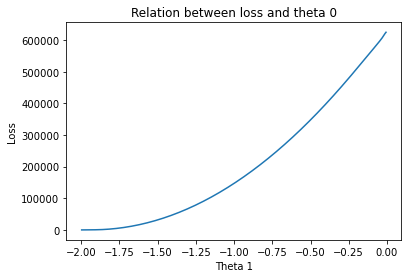

In [142]:
plt.plot(theta1ListADAM,errorADAM)
plt.title("Relation between loss and theta 0")
plt.xlabel("Theta 1")
plt.ylabel("Loss")

Text(0.5, 1.0, 'Relation between all fitted lines per epoch')

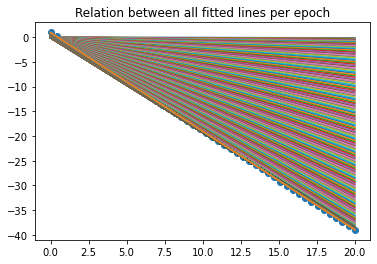

In [143]:
plt.scatter(X,y)
plt.plot(X,np.array(hxListADAM).T)
plt.title("Relation between all fitted lines per epoch")


Text(0.5, 1.0, 'Best fitted line')

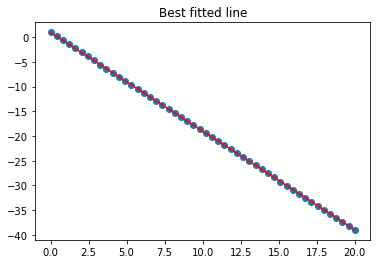

In [145]:
plt.scatter(X,y)
plt.plot(X,hxADAM,color='Red')
plt.title("Best fitted line")

## Congratulations 
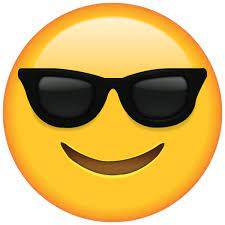